In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle


In [6]:
df= pd.read_csv('Admission_Prediction.csv') 
df.head()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          485 non-null    float64
 2   TOEFL Score        490 non-null    float64
 3   University Rating  485 non-null    float64
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 35.3 KB


In [9]:
df.isna().sum()

Serial No.            0
GRE Score            15
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

In [12]:
df['GRE Score'].fillna(df['GRE Score'].mode()[0],inplace=True)
df['TOEFL Score'].fillna(df['TOEFL Score'].mode()[0],inplace=True)
df['University Rating'].fillna(df['University Rating'].mean()[0],inplace=True)
df.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [14]:
X = df.drop(['Chance of Admit','Serial No.'],axis=1)
Y = df['Chance of Admit']

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit, Length: 500, dtype: float64

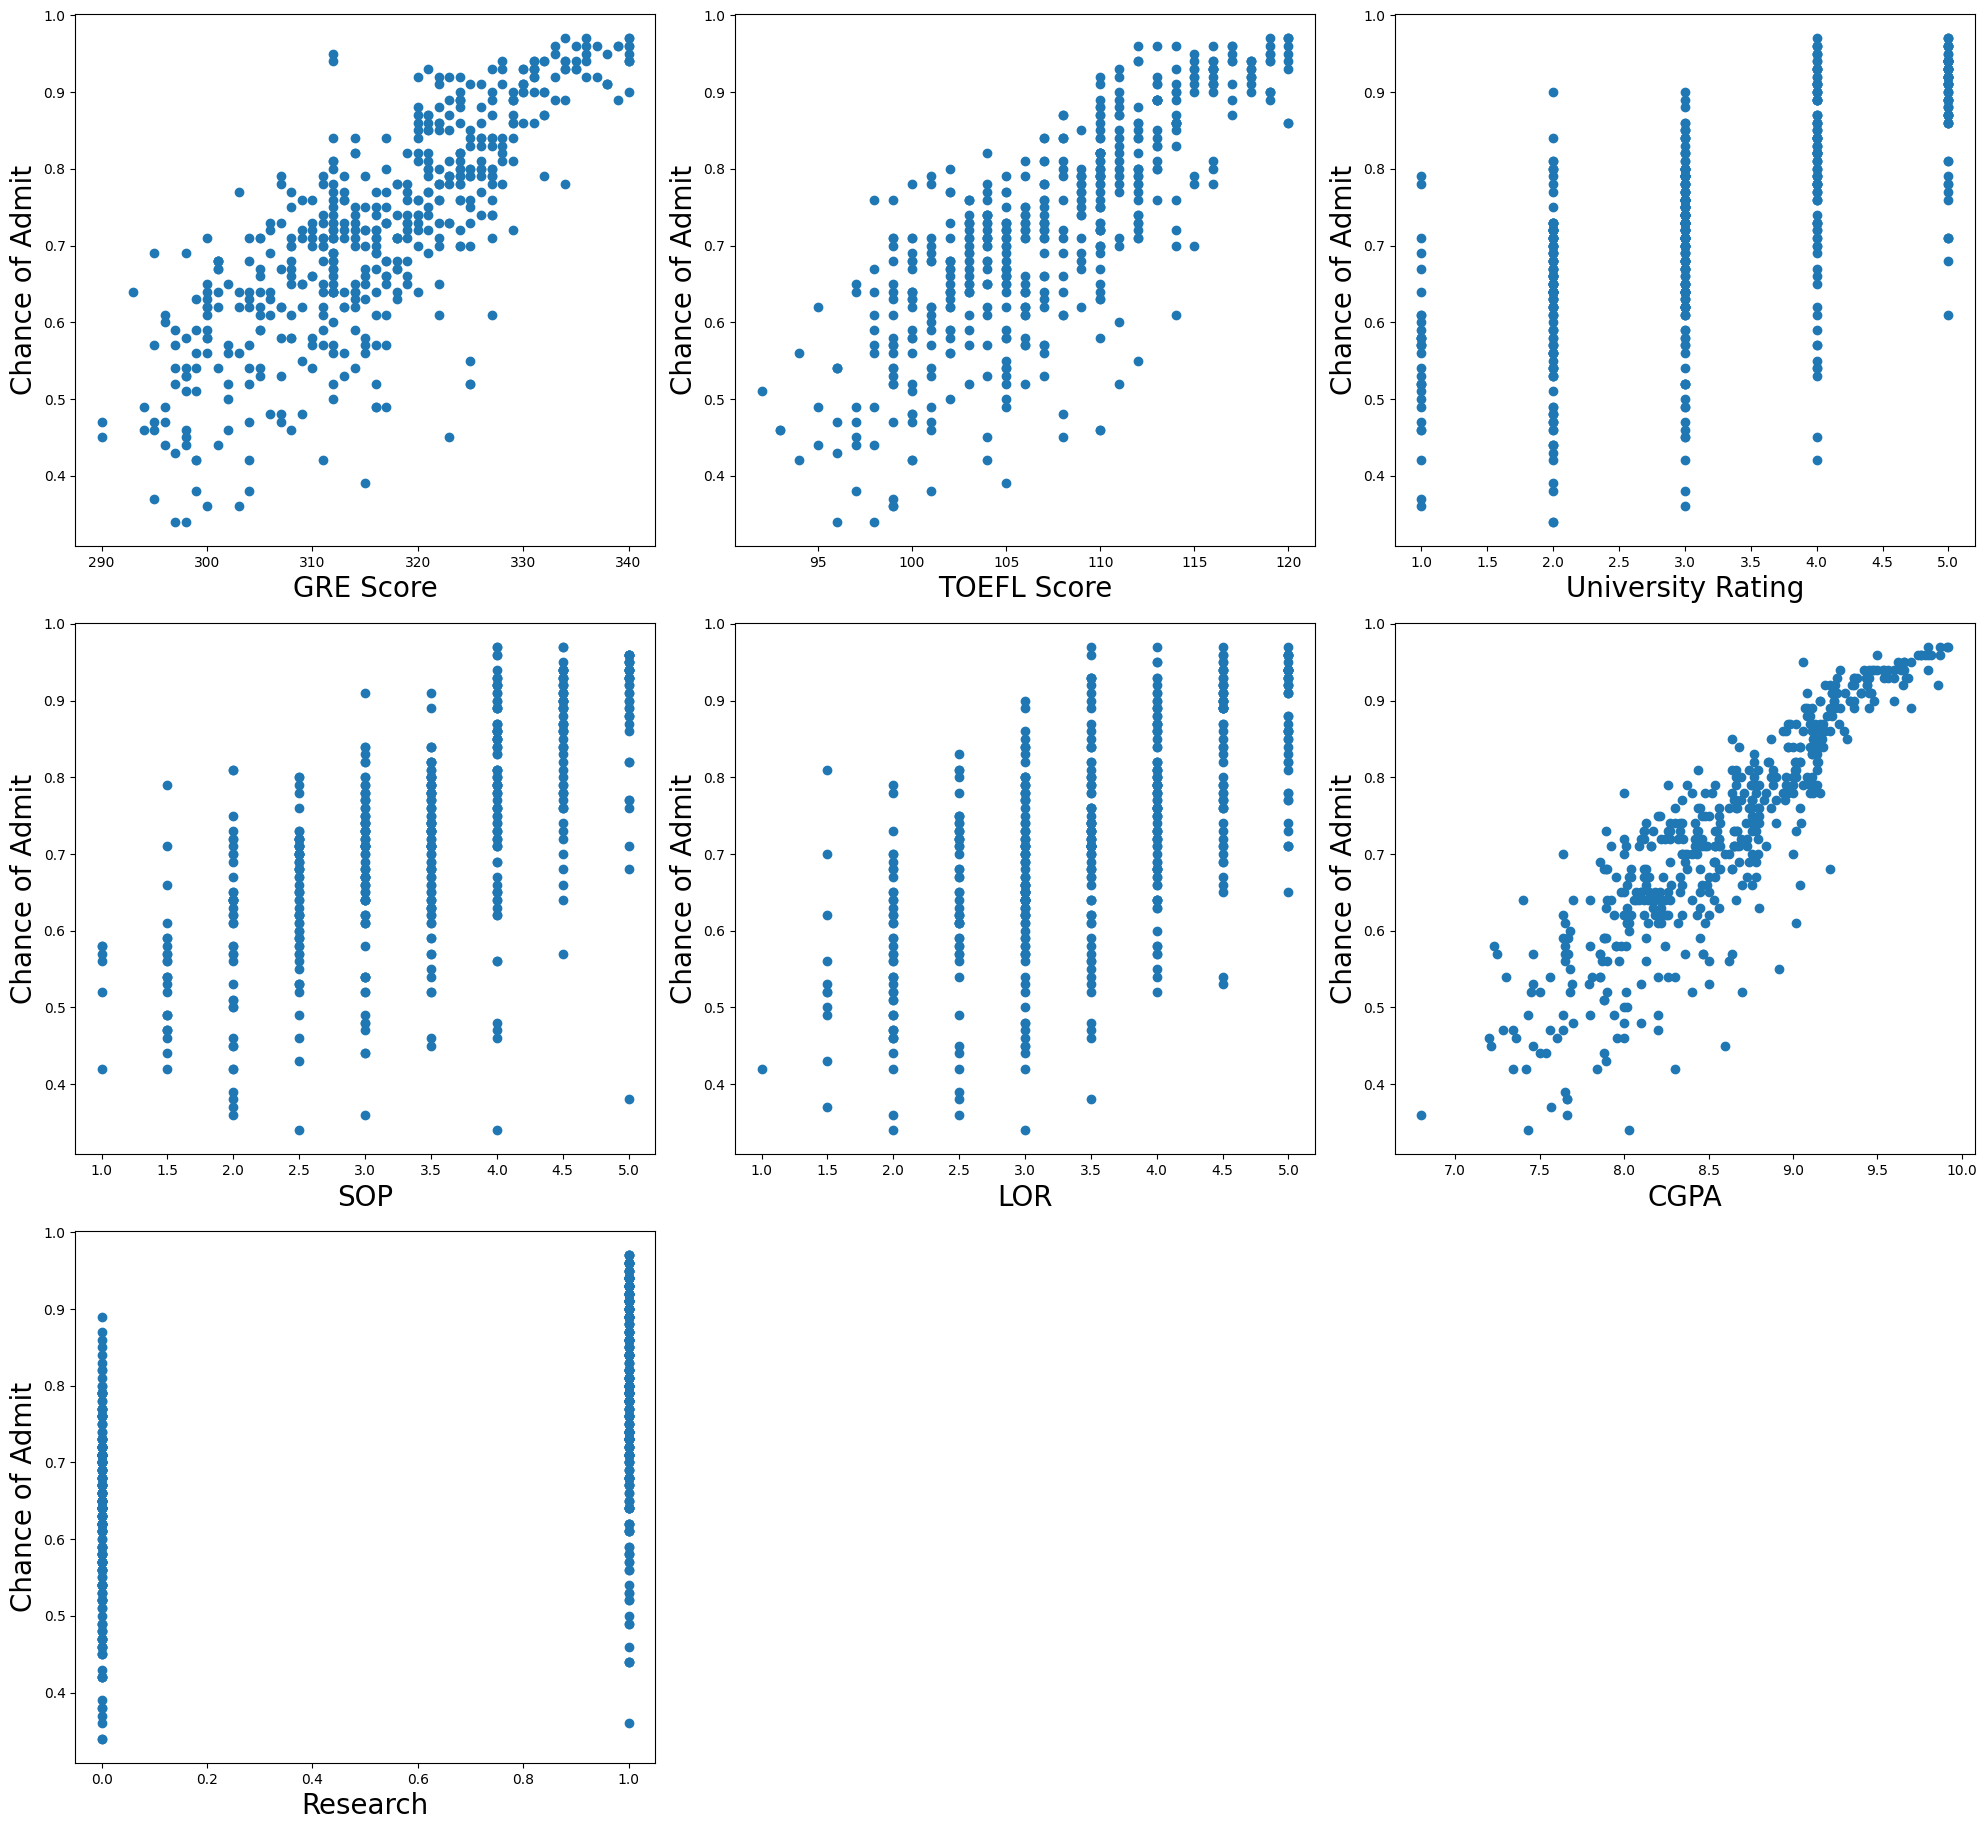

In [28]:
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=15:
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(X[column],Y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Chance of Admit',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [31]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(X,Y,test_size=0.33, 
random_state=100)


In [32]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(train_x, train_y)


LinearRegression()

In [35]:
from sklearn.metrics import r2_score
score= r2_score(reg.predict(test_x),test_y)
score

0.8076681567897024

In [37]:
filename = 'finalised_model.pickle'
pickle.dump(reg, open(filename, 'wb'))


In [39]:
loaded_model = pickle.load(open(filename, 'rb'))
prediction=loaded_model.predict(([[320,120,5,5,5,10,1]]))
print(prediction[0])


0.9957479938592626


C:\Users\ADMIN\anaconda3\envs\bmrl\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
